In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import hdbscan

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_digits, make_blobs
from matplotlib.dates import MonthLocator, DateFormatter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from utils import (
    col_out,
    model_summary,
    adj_r2_score,
    model_performance_regression,
    confusion_matrix_helper,
    model_performance_classification_sklearn,
)

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    silhouette_score
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

import xgboost as xgb

set_config(display='diagram')
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
bigfive_data = pd.read_csv('bigfive_cleaned.csv', delimiter = ',')
bigfive_df = pd.DataFrame(data=bigfive_data)


In [3]:
bigfive_df.describe().T

,count,mean,std,min,25%,50%,75%,max
EXT1,570277.0,2.580108,1.237135e+00,1.0,1.0,3.0,4.0,5.000000e+00
EXT2-,570277.0,3.160664,1.303248e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT3,570277.0,3.236378,1.190181e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT4-,570277.0,2.784140,1.205325e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT5,570277.0,3.253906,1.245470e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT6-,570277.0,3.584535,1.209370e+00,1.0,3.0,4.0,5.0,5.000000e+00
EXT7,570277.0,2.718151,1.370464e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT8-,570277.0,2.526823,1.236456e+00,1.0,1.0,2.0,3.0,5.000000e+00
EXT9,570277.0,2.950547,1.322772e+00,1.0,2.0,3.0,4.0,5.000000e+00
EXT10-,570277.0,2.380634,1.263231e+00,1.0,1.0,2.0,3.0,5.000000e+00


In [4]:
bigfive_df.head()

,EXT1,EXT2-,EXT3,EXT4-,EXT5,EXT6-,EXT7,EXT8-,EXT9,EXT10-,EST1-,EST2,EST3-,EST4,EST5-,EST6-,EST7-,EST8-,EST9-,EST10-,AGR1-,AGR2,AGR3-,AGR4,AGR5-,AGR6,AGR7-,AGR8,AGR9,AGR10,CSN1,CSN2-,CSN3,CSN4-,CSN5,CSN6-,CSN7,CSN8-,CSN9,CSN10,OPN1,OPN2-,OPN3,OPN4-,OPN5,OPN6-,OPN7,OPN8,OPN9,OPN10,dateload,screenw,screenh,introelapse,testelapse,endelapse,country,Extroversion Score,Agreeableness Score,Conscientiousness Score,Neuroticism Score,Openness Score
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,GBR,36.0,29.0,22.0,26.0,35.0
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,1.0,3.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,MYS,10.0,34.0,27.0,25.0,25.0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,GBR,15.0,32.0,24.0,24.0,31.0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,GBR,16.0,28.0,15.0,21.0,29.0
4,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,2.0,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,SWE,22.0,28.0,27.0,28.0,34.0


In [5]:
participants_bycountry = bigfive_df['country'].value_counts().reset_index()
participants_bycountry.columns = ['country', 'Participants']

In [6]:
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap = worldmap[worldmap['continent'] != 'Antarctica']

merged = worldmap.merge(participants_bycountry, how='left', left_on='iso_a3', right_on='country')

In [86]:
merged['Log_Participants'] = np.log(merged['Participants'] + 1)

fig = px.choropleth(merged, 
                    geojson=merged.geometry, 
                    locations=worldmap.index, 
                    color='Log_Participants',
                    color_continuous_scale='YlGn',
                    hover_name='name',
                    title='LogCount of Participants by Country')
fig.update_geos(showcountries=True, countrycolor='Black', lataxis_range=[-59, 90])
fig.update_layout(height=600, width=1000,
                 title_x=0.08, title_y=0.8)
fig.show()


In [8]:
#Numerical columns
num_cols = bigfive_df.select_dtypes(include=[np.number])

#Categorical columns
cat_cols = bigfive_df.select_dtypes(exclude=[np.number])

In [95]:
p_scores = bigfive_df.loc[:,['Extroversion Score','Agreeableness Score','Conscientiousness Score',
                               'Neuroticism Score','Openness Score']]
p_scores_columns = ['Openness Score','Conscientiousness Score','Extroversion Score','Agreeableness Score',
                               'Neuroticism Score']

answer_columns = ['OPN1','OPN2-','OPN3','OPN4-','OPN5','OPN6-','OPN7','OPN8','OPN9','OPN10',
                  'CSN1','CSN2-','CSN3','CSN4-','CSN5','CSN6-','CSN7','CSN8-','CSN9','CSN10',
                  'EXT1','EXT2-','EXT3','EXT4-','EXT5','EXT6-','EXT7','EXT8-','EXT9','EXT10-',
                  'AGR1-','AGR2','AGR3-','AGR4','AGR5-','AGR6','AGR7-','AGR8','AGR9','AGR10',
                  'EST1-','EST2','EST3-','EST4','EST5-','EST6-','EST7-','EST8-','EST9-','EST10-']

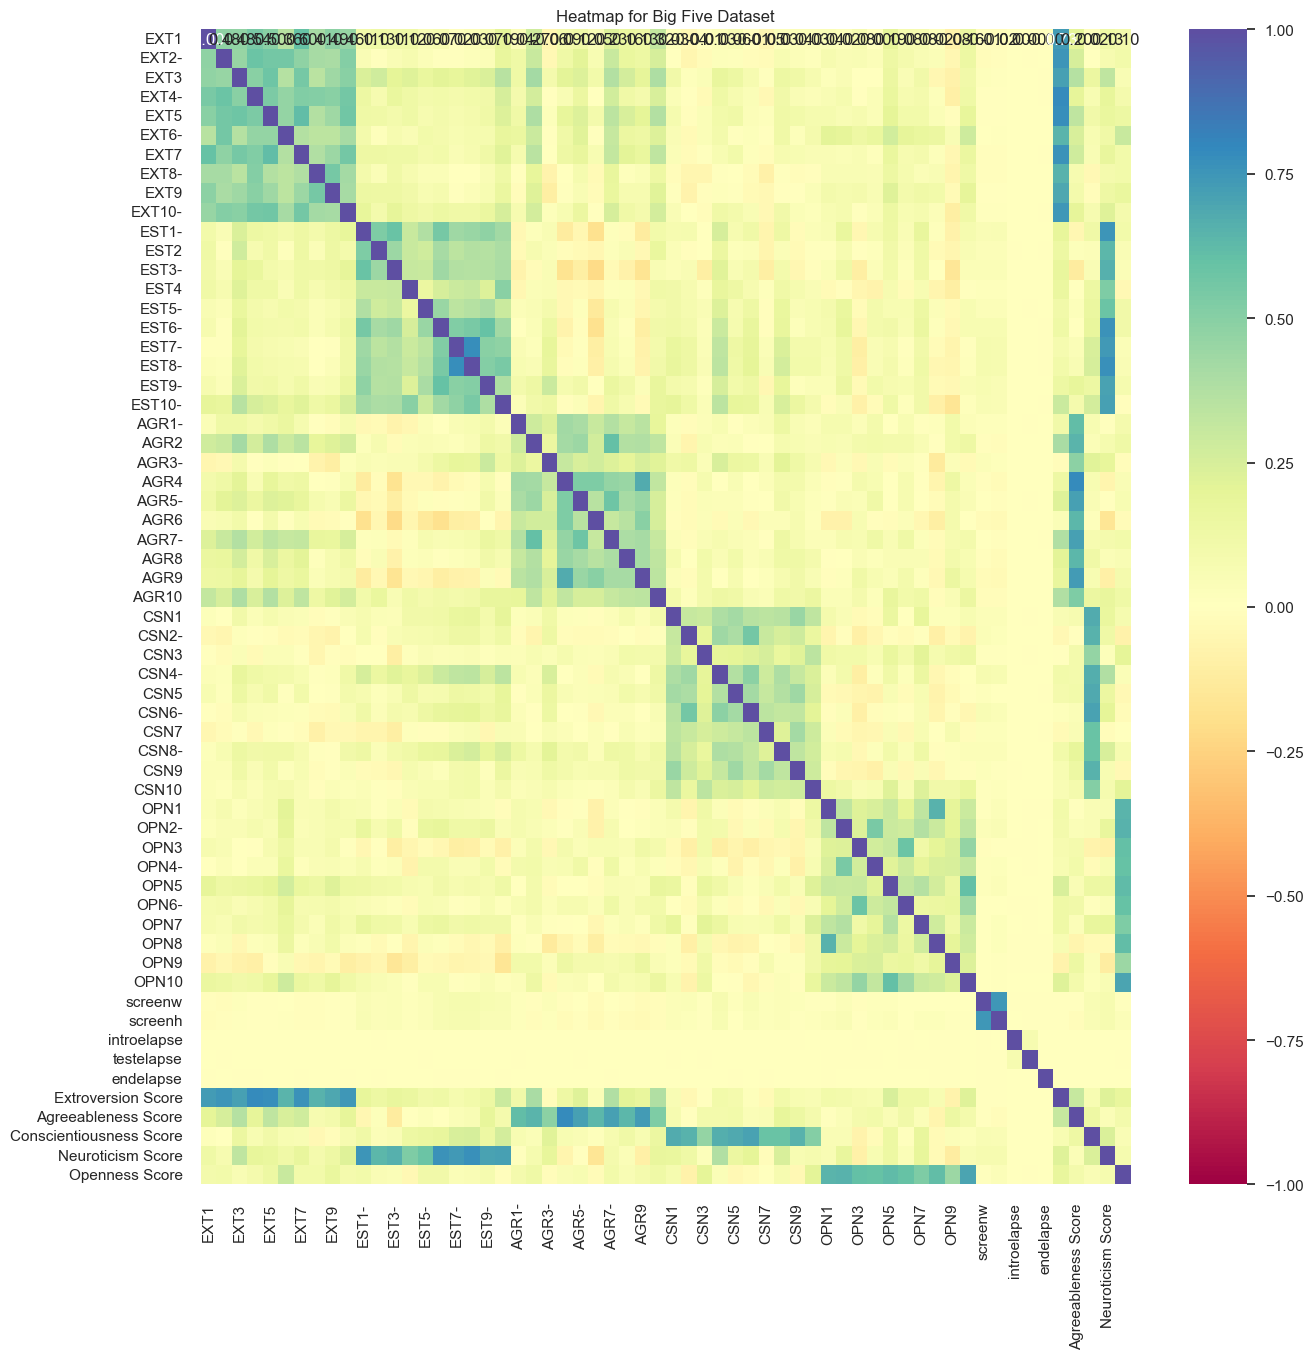

In [9]:
#Explore Numerical Variables

#Correlation Table for Numerical Variables
corr_table = num_cols.corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
sns.heatmap(corr_table, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heatmap for Big Five Dataset")
plt.show()

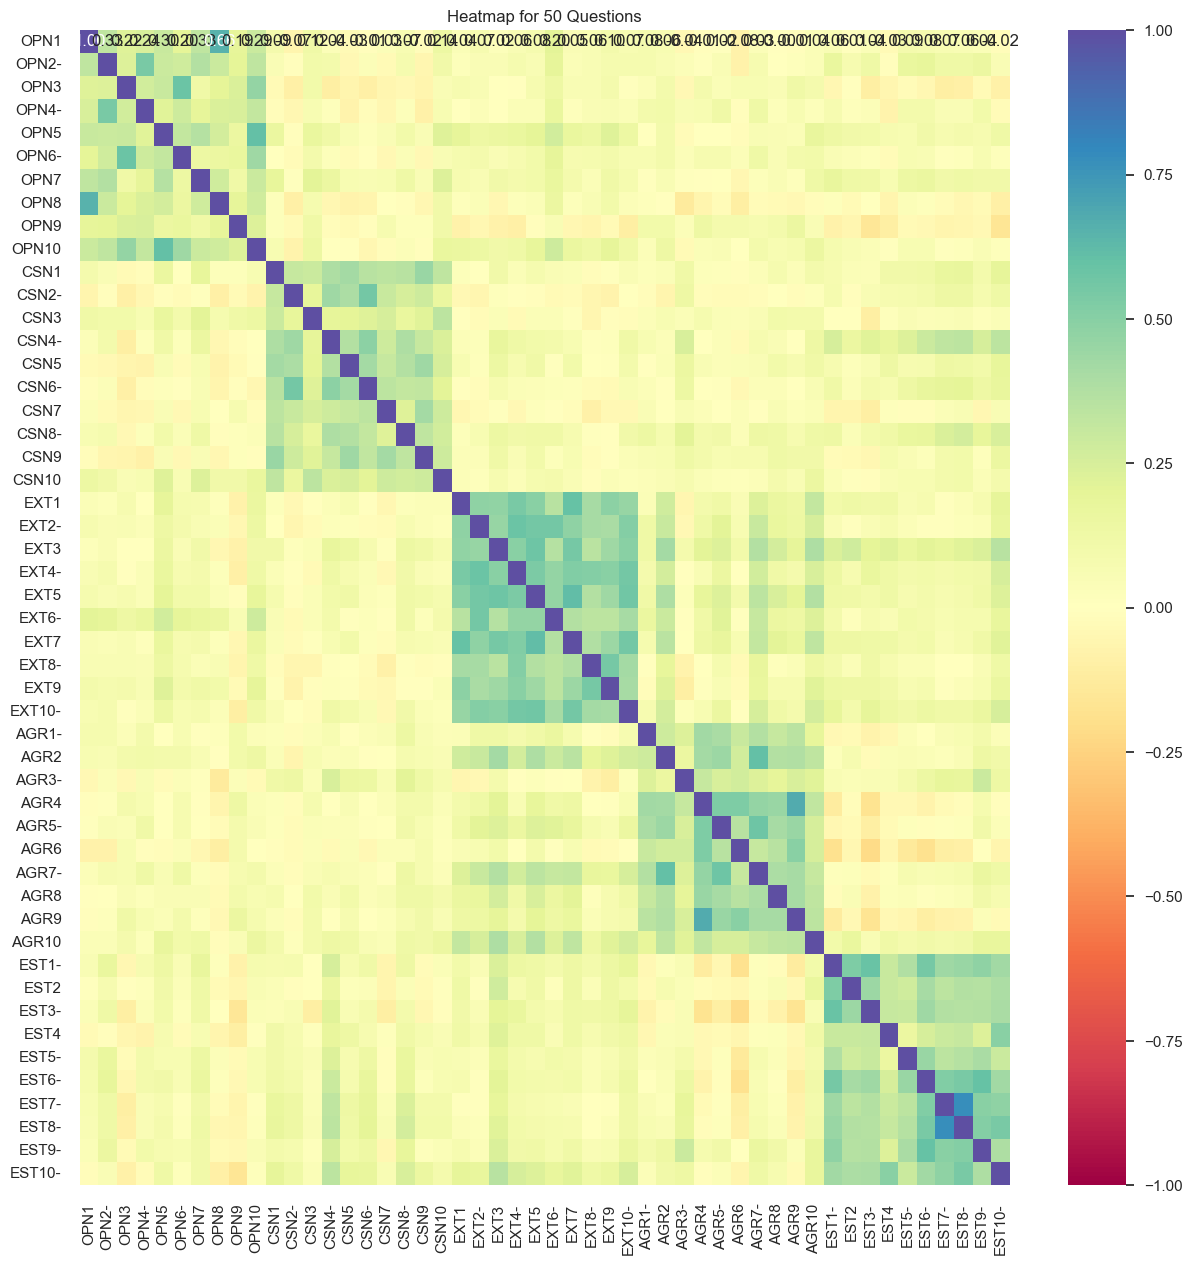

In [96]:
#Correlation Table for Answer Columns
corr_table = bigfive_df[answer_columns].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
sns.heatmap(corr_table, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heatmap for 50 Questions")
plt.show()

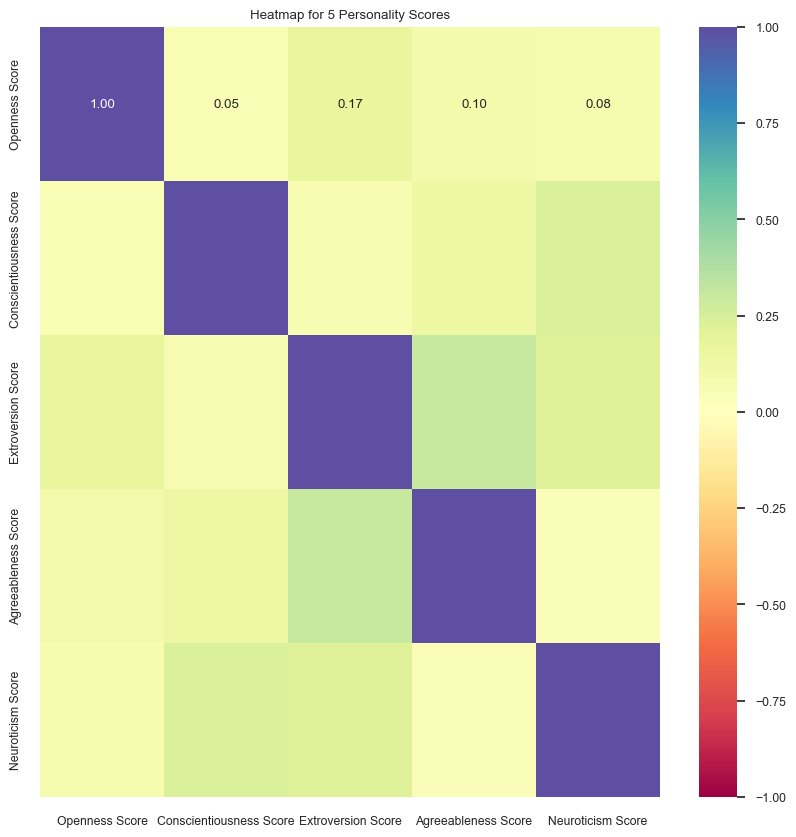

In [99]:
#Correlation Table for Answer Columns
corr_table = bigfive_df[p_scores_columns].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(corr_table, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heatmap for 5 Personality Scores")
plt.show()

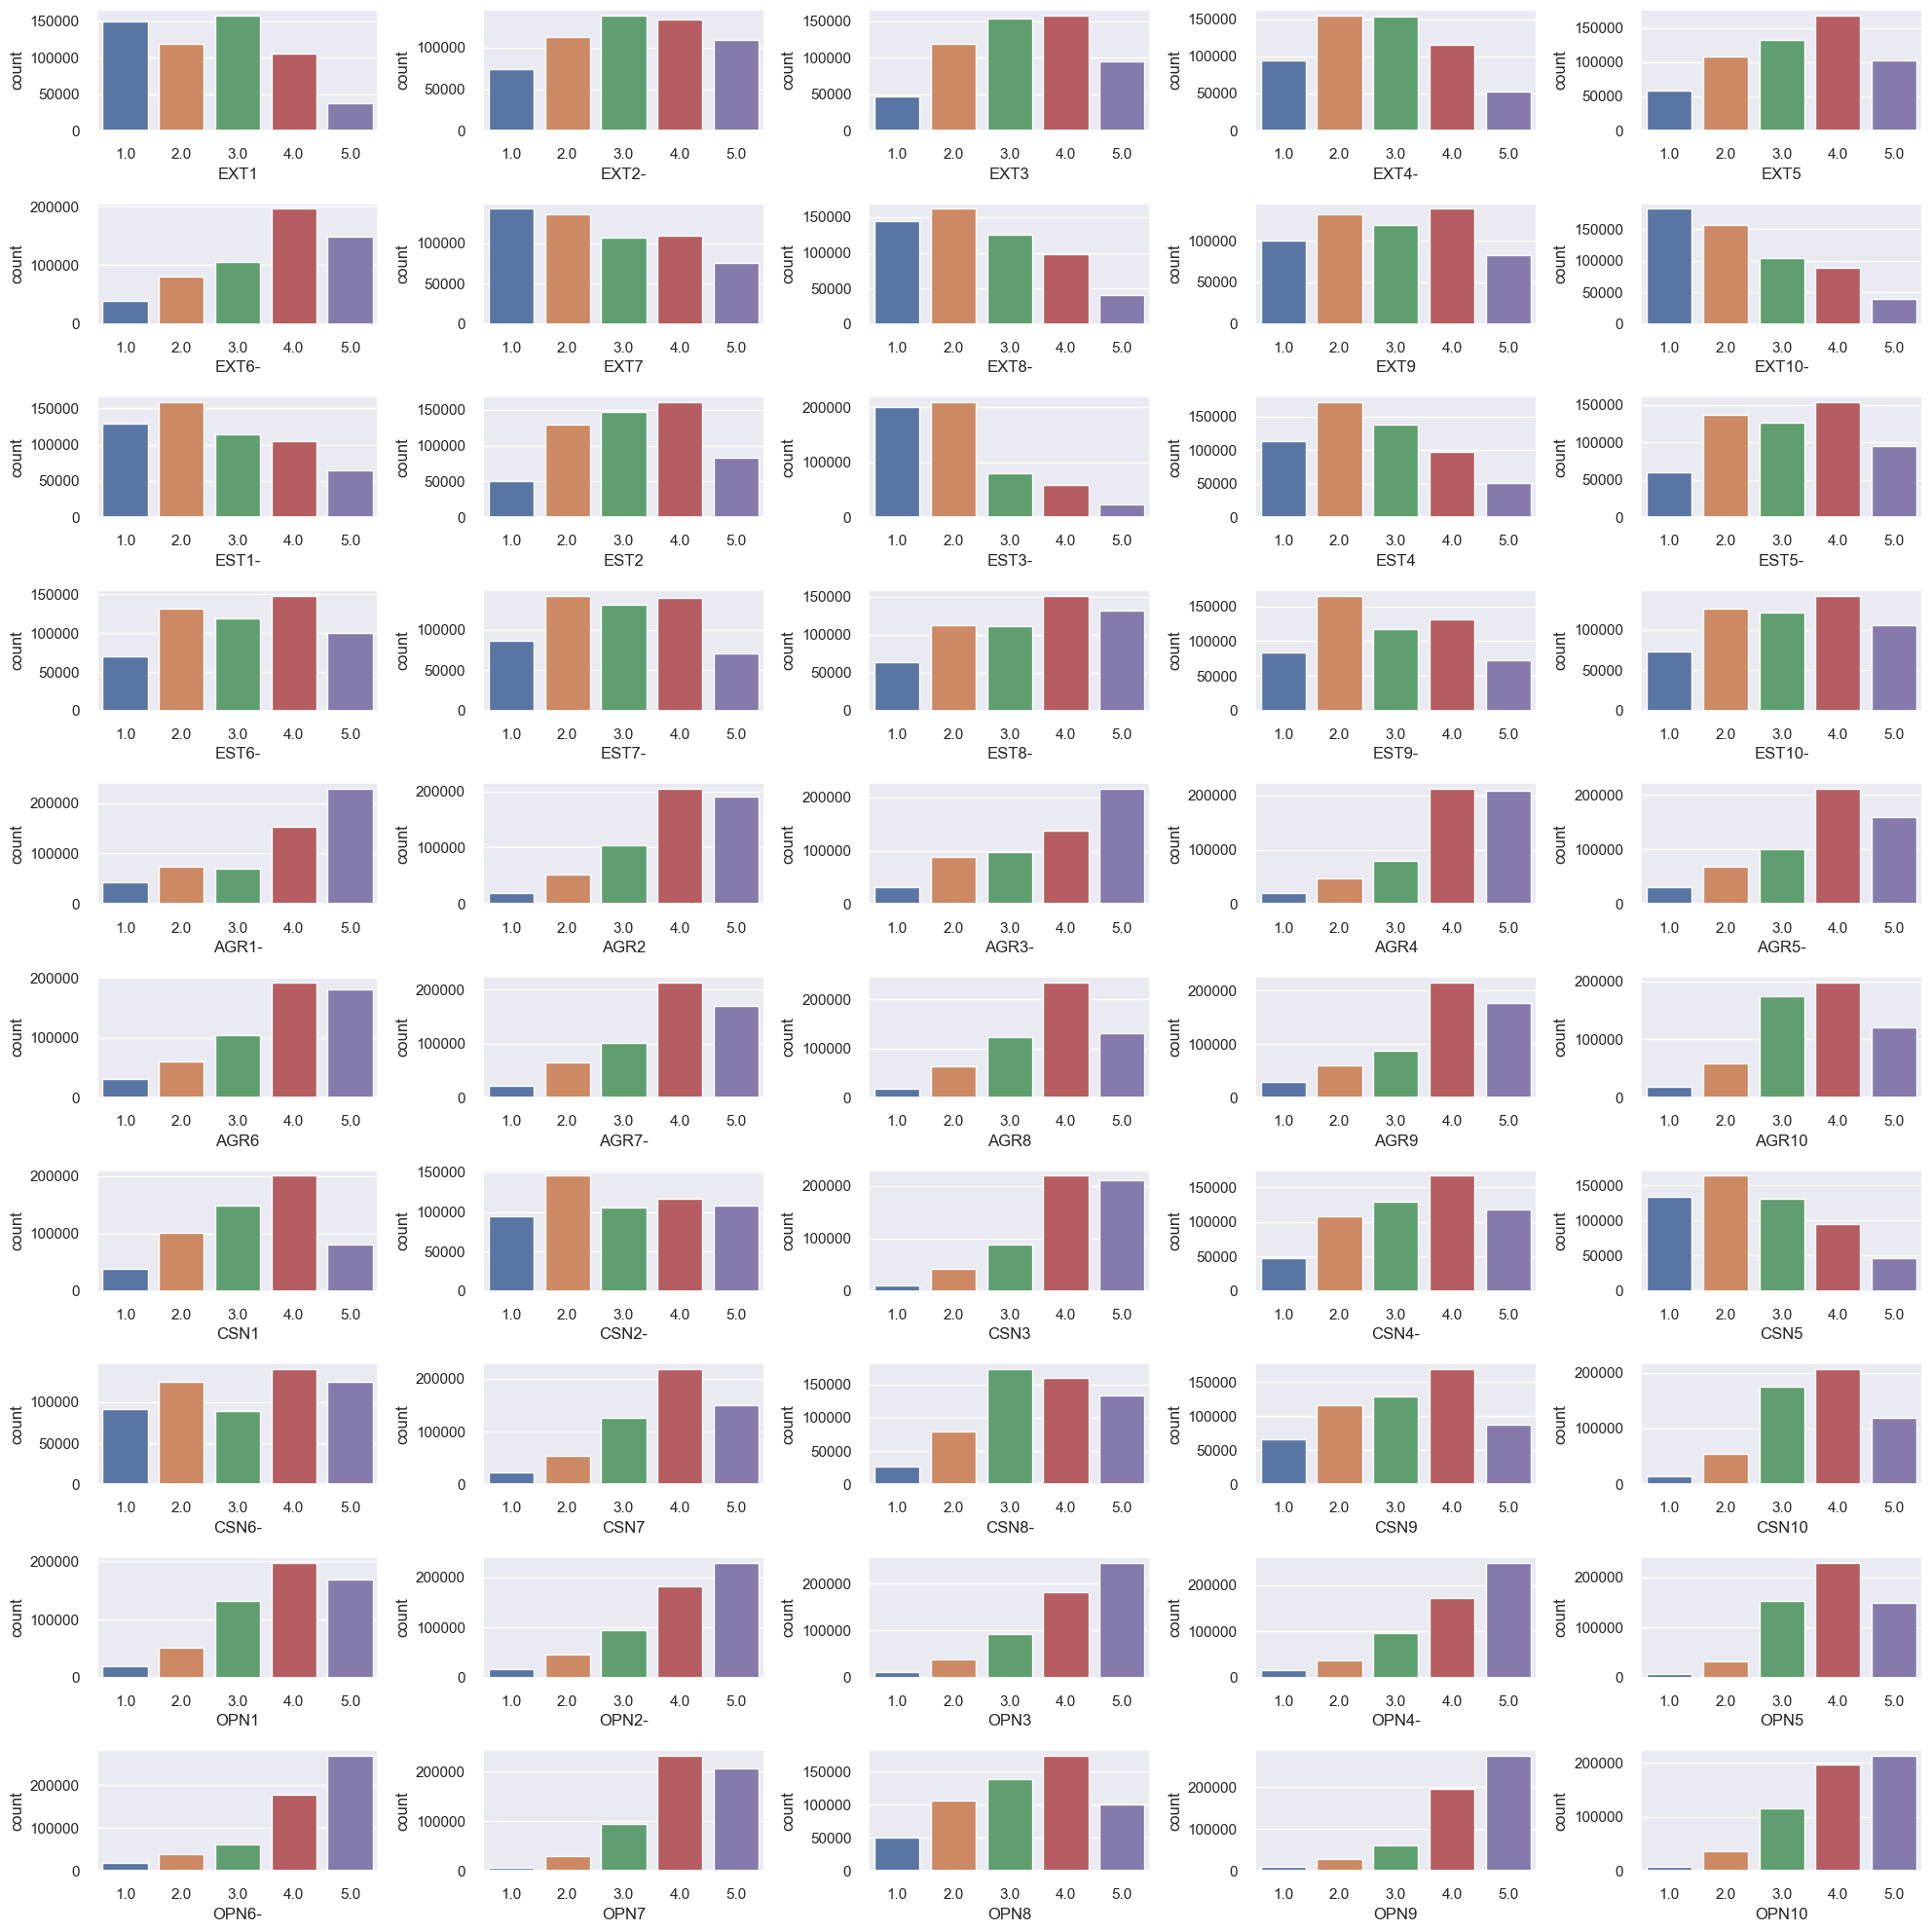

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Counting up responses
fig, axes = plt.subplots(10,5, figsize=(20,20))
axes = axes.flatten()
for i, col in enumerate (num_cols.columns[:50]):
        sns.countplot(x=col, data=num_cols, ax=axes[i])
plt.tight_layout()
plt.show()


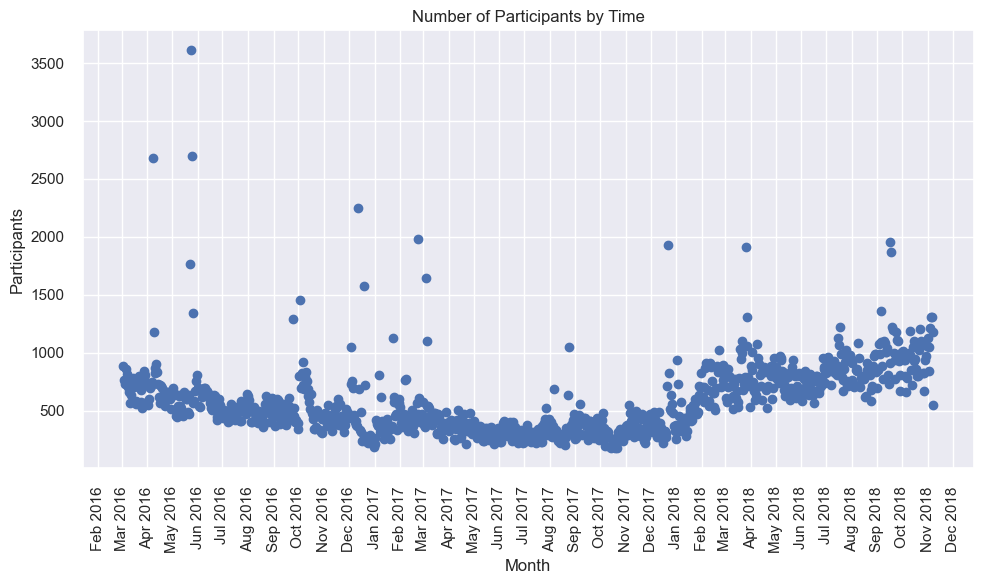

In [77]:
#Explore Time
bigfive_time = pd.DataFrame({'timestamp': pd.to_datetime(bigfive_df['dateload'])})
time_series = bigfive_time.groupby(bigfive_time['timestamp'].dt.date).size()

plt.figure(figsize=(10, 6))
plt.scatter(time_series.index, time_series.values)
plt.xlabel('Month')
plt.ylabel('Participants')
plt.title('Number of Participants by Time')

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

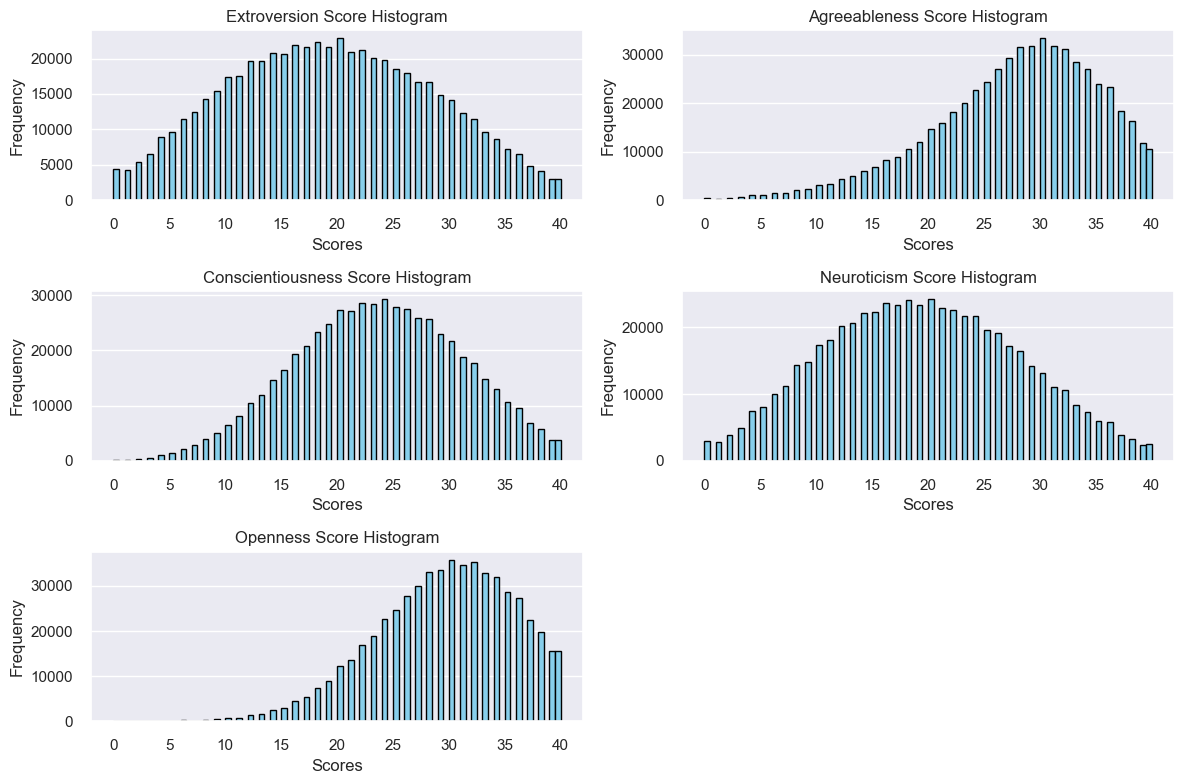

CPU times: total: 2.52 s
Wall time: 2.53 s


In [85]:
%%time
plt.figure(figsize=(12, 8))

for i, col in enumerate(p_scores.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(p_scores[col], bins=int((max(p_scores[col] - min(p_scores[col]))/.5)),
                                     color = 'skyblue', edgecolor='black')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title(col + ' Histogram')
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

In [14]:
#K-means Clustering Functions
def run_k_means(data, clusters, n_init, random_state):
    elbow = []
    sil_score = []

    # perform k-means clustering for different values of k
    for k in clusters:
        model = KMeans(n_clusters=k, n_init=n_init, random_state = random_state).fit(data)
        prediction = model.predict(data)

        # within cluster sum of squared distances between each member of the cluster and its centroid
        wcss = model.inertia_
        elbow.append(wcss)

        # Silhouette score
        score = silhouette_score(data, prediction)
        sil_score.append(score)
        print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))

    plt.plot(clusters, elbow, "bx-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Selecting k with the Elbow Method")
    plt.show()

    plt.plot(clusters, sil_score)
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Selecting k with Silhouette score")
    plt.show()

In [15]:
# function to plot silhouette scores
def plot_silhouette(data, optimal_k, n_init, random_state):
    # run k-mean for the optimal value of k
    kmeans = KMeans(n_clusters=optimal_k, n_init=n_init, random_state=random_state)

    # visualizing the silhouette score
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.show()


In [16]:
#K-means Clustering Functions
def run_minibatch_k_means(data, clusters, n_init, batchsize, random_state):
    elbow = []
    sil_score = []

    # perform k-means clustering for different values of k
    for k in clusters:
        model = MiniBatchKMeans(n_clusters=k, n_init=n_init, 
                                batch_size=batchsize, random_state = random_state).fit(data)
        prediction = model.predict(data)

        # within cluster sum of squared distances between each member of the cluster and its centroid
        wcss = model.inertia_
        elbow.append(wcss)

        # Silhouette score
        score = silhouette_score(data, prediction)
        sil_score.append(score)
        print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))

    plt.plot(clusters, elbow, "bx-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Selecting k with the Elbow Method")
    plt.show()

    plt.plot(clusters, sil_score)
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Selecting k with Silhouette score")
    plt.show()

In [102]:
pscores = bigfive_df[p_scores_columns].copy()
answers = bigfive_df[answer_columns].copy()

#sample size to determine best number of clusters optimal_k
answers_sample = answers.sample(n=10000)
pscores_sample = pscores.sample(n=10000)


For n_clusters = 2, WCSS: = 617590.1567382527, Silhouette score: 0.09919073364050514)
For n_clusters = 3, WCSS: = 599415.7124370943, Silhouette score: 0.07410210723989347)
For n_clusters = 4, WCSS: = 567189.3486445864, Silhouette score: 0.060064452433759484)
For n_clusters = 5, WCSS: = 554019.8757148976, Silhouette score: 0.051999655767986735)
For n_clusters = 6, WCSS: = 539078.3053117187, Silhouette score: 0.05224579081599508)
For n_clusters = 7, WCSS: = 531761.6817203425, Silhouette score: 0.04538566899509626)
For n_clusters = 8, WCSS: = 525659.2510211854, Silhouette score: 0.045215602656558045)
For n_clusters = 9, WCSS: = 516151.6788738613, Silhouette score: 0.04271565205306628)
For n_clusters = 10, WCSS: = 507886.9462751839, Silhouette score: 0.04115828833849128)
For n_clusters = 11, WCSS: = 505298.15974542405, Silhouette score: 0.041359201477765)
For n_clusters = 12, WCSS: = 498805.30188273045, Silhouette score: 0.04008364047373549)
For n_clusters = 13, WCSS: = 499030.6605543109, 

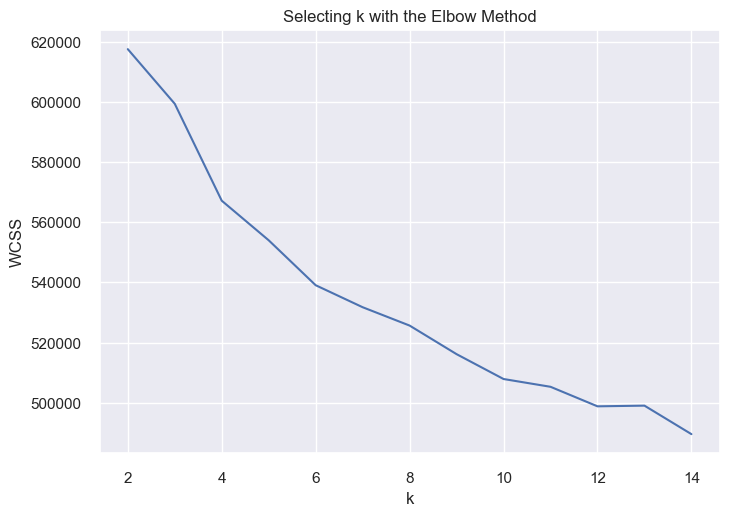

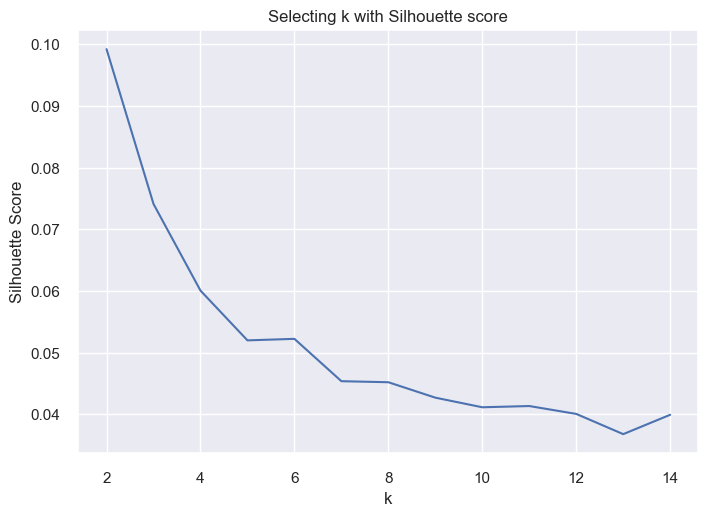

CPU times: total: 52 s
Wall time: 34.1 s


In [18]:
%%time

clusters = list(range(2,15))
n_init = 10
clustersize = 1000
random_state = 42

run_minibatch_k_means(answers_sample, clusters, n_init, clustersize, random_state)

In [ ]:
optimal_k = 6 #optimal value of k from the Silhouette score
n_init = 10
random_state = 42

# for unscaled data, all columns are on the same scale
print('For unscaled data')
plot_silhouette(answers_sample, optimal_k, n_init, random_state)


In [ ]:
%%time

clusters = list(range(2,15))
n_init = 10
random_state = 42

run_k_means(answers_sample, clusters, n_init, random_state)

For unscaled data


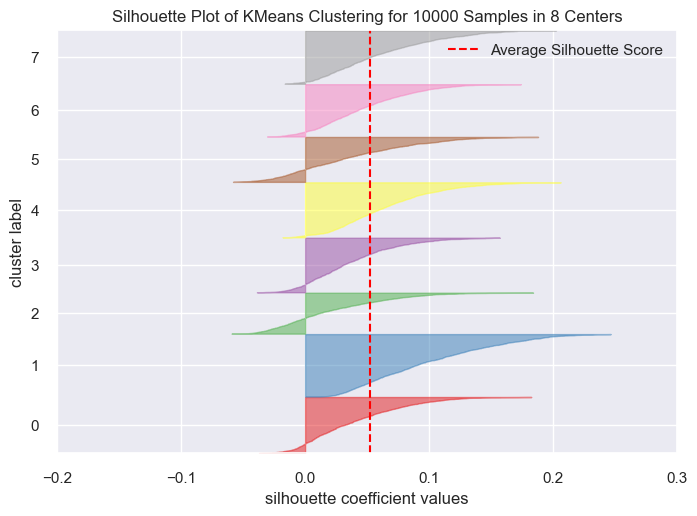

In [21]:
optimal_k = 8 #optimal value of k from the Silhouette score
n_init = 10
random_state = 42

# for unscaled data, all columns are on the same scale
print('For unscaled data')
plot_silhouette(answers_sample, optimal_k, n_init, random_state)


For n_clusters = 2, WCSS: = 2310300.837913125, Silhouette score: 0.21191414528753222)
For n_clusters = 3, WCSS: = 2026885.8313195175, Silhouette score: 0.17026252766837954)
For n_clusters = 4, WCSS: = 1827121.5022312666, Silhouette score: 0.1590917282730666)
For n_clusters = 5, WCSS: = 1682519.000086176, Silhouette score: 0.15962424136892167)
For n_clusters = 6, WCSS: = 1585601.1971467794, Silhouette score: 0.15544608697554307)
For n_clusters = 7, WCSS: = 1499156.0518775336, Silhouette score: 0.15133215465283864)
For n_clusters = 8, WCSS: = 1425761.558612319, Silhouette score: 0.14946041615929756)
For n_clusters = 9, WCSS: = 1367136.2924084053, Silhouette score: 0.14242901735625105)
For n_clusters = 10, WCSS: = 1310986.727683331, Silhouette score: 0.1419803654872651)
For n_clusters = 11, WCSS: = 1264761.5561288025, Silhouette score: 0.1421825641833798)
For n_clusters = 12, WCSS: = 1220470.1188011947, Silhouette score: 0.1430730805790375)
For n_clusters = 13, WCSS: = 1181144.376602984, 

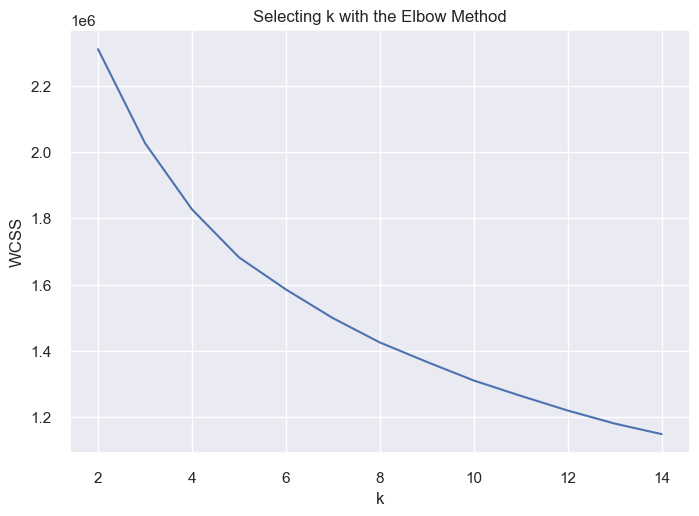

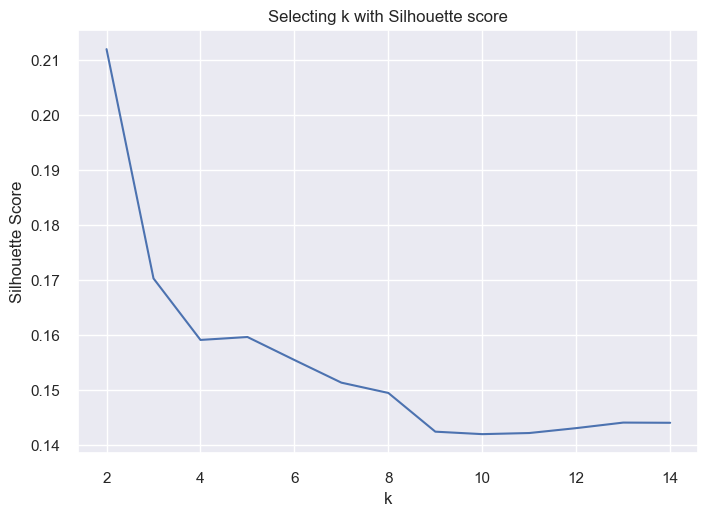

CPU times: total: 57 s
Wall time: 32.3 s


In [22]:
%%time

clusters = list(range(2,15))
n_init = 10
random_state = 42

run_k_means(pscores_sample, clusters, n_init, random_state)

For unscaled data


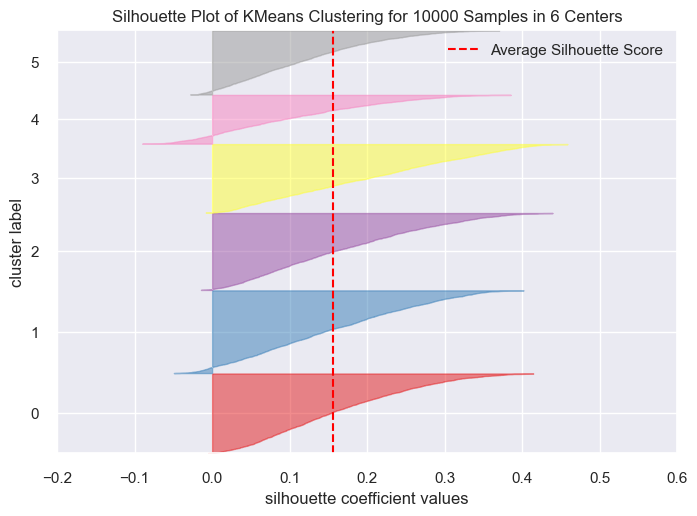

In [23]:
optimal_k = 6 #optimal value of k from the Silhouette score
n_init = 10
random_state = 42

# for unscaled data
print('For unscaled data')
plot_silhouette(pscores_sample, optimal_k, n_init, random_state)


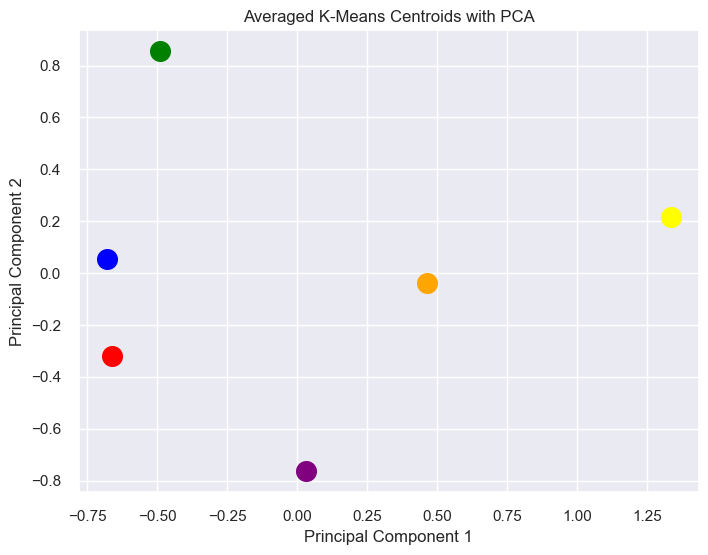

CPU times: total: 4min 47s
Wall time: 1min 12s


In [24]:
%%time

num_samples = 12
optimal_k = 6  #optimal number of clusters from "answers" samples ~6-8
cluster_assignments = []
centroids = []
num_components = 2
sample_size = 100000

# K-Means clustering on multiple samples and collect cluster assignments and centroids
for i in range(num_samples):
    answers_sample = answers.sample(sample_size)

    kmeans = KMeans(n_clusters=optimal_k)
    cluster_labels = kmeans.fit_predict(answers_sample)
    answers_sample[f'Cluster_{i+1}'] = cluster_labels
    
    cluster_assignments.append(kmeans.labels_)
    centroids.append(kmeans.cluster_centers_)

# Average the cluster assignments and centroids
average_cluster_assignments = np.mean(cluster_assignments, axis=0)
average_centroids = np.mean(centroids, axis=0)

# Reduce dimensionality using PCA
pca = PCA(n_components=num_components)
reduced_centroids = pca.fit_transform(average_centroids)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'] 

# Visualize in reduced space
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(reduced_centroids[i, 0], reduced_centroids[i, 1], 
                marker='o', s=200, color=colors[i], label=f'Cluster {i+1}')
plt.title('Averaged K-Means Centroids with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:1072: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



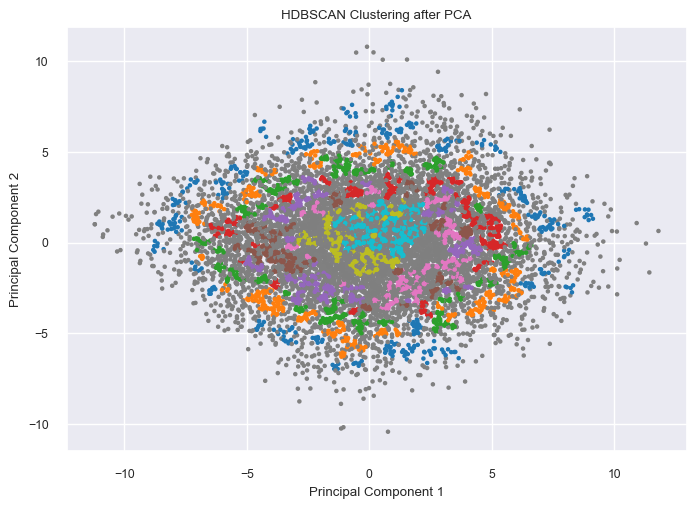

In [107]:
# Extract the data
answers_sample = answers.sample(10000)
X = answers_sample.values  # Assuming all columns are numeric

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# HDBSCAN clustering on reduced dimensions
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
cluster_labels = clusterer.fit_predict(X_pca)

# Adding the cluster labels to the DataFrame
answers_sample['HDBCluster_Labels'] = cluster_labels

# Extract unique cluster labels and sort them
unique_labels = np.unique(cluster_labels)
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise points if present
num_clusters = len(unique_labels)

# Define a list of colors for each cluster
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'] 
if num_clusters > len(colors):
    import matplotlib.cm as cm
    colors = cm.tab10(np.linspace(0, 1, num_clusters))

# Create a dictionary mapping each cluster label to a color
label_color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Assign colors based on the cluster label
cluster_colors = [label_color_map[label] if label != -1 else 'gray' for label in cluster_labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors, s=5)
plt.title('HDBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [108]:
answers_sample_reduced = answers_sample.sample(frac = 0.5) 

silhouette_avg = silhouette_score(answers_sample_reduced, answers_sample_reduced['HDBCluster_Labels'])
print(f"Silhouette Score: {silhouette_avg}")

#Produces negative S-score, which doesn't provide distinct clusters for this dataset

Silhouette Score: -0.012953414545822599


In [26]:
%%time

sample_size = 100000 #reducing sample size due to memory issues on dendrogram
num_samples = 12 # Selecting a large enough number but not optimized yet
num_clusters = 6  # Optimal_k

# Randomly select a sample rows from the dataset
answers_sample = answers.sample(n=sample_size)
sample_indices = answers_sample.shape[0]

# Bagging with clustering
cluster_assignments = []

for i in range(num_samples):
    # Randomizing samples
    answers_resample = answers_sample.sample(n=sample_size)
    sample_indices = answers_resample.shape[0]

    # K-Means clustering on the resampled data
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(answers_resample)
    
    # Append cluster assignments to the list
    cluster_assignments.append(cluster_labels)

# Calculate mode for each row across samples
mode_cluster_assignments = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=np.array(cluster_assignments))

# Assign cluster labels to the "answers" sample using the mode assignments
kmeans_final = KMeans(n_clusters=num_clusters)
kmeans_final.fit(answers_sample)
cluster_labels = kmeans_final.predict(answers)

# Assign the cluster labels to the original dataset for answers, pscores, and cleaned dataset
answers_with_clusters = pd.DataFrame(answers)
answers_with_clusters['Cluster'] = cluster_labels
pscores_with_clusters = pd.DataFrame(pscores)
pscores_with_clusters['Cluster'] = cluster_labels
#bigfive_with_clusters = pd.DataFrame(bigfive_df)
#bigfive_with_clusters['Cluster'] = cluster_labels

CPU times: total: 8min 44s
Wall time: 1min 19s


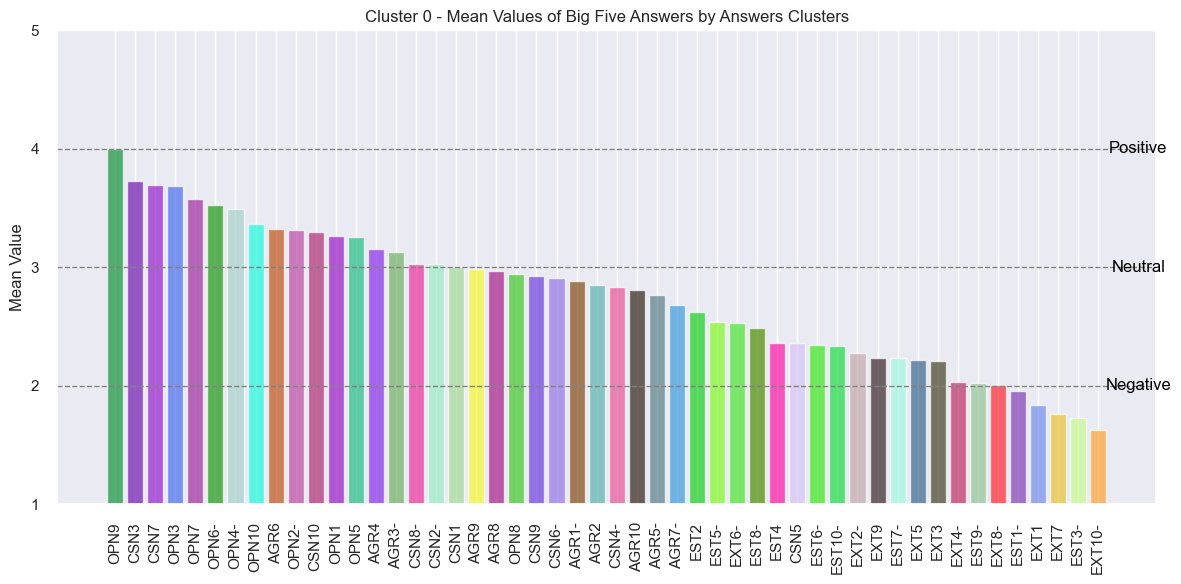

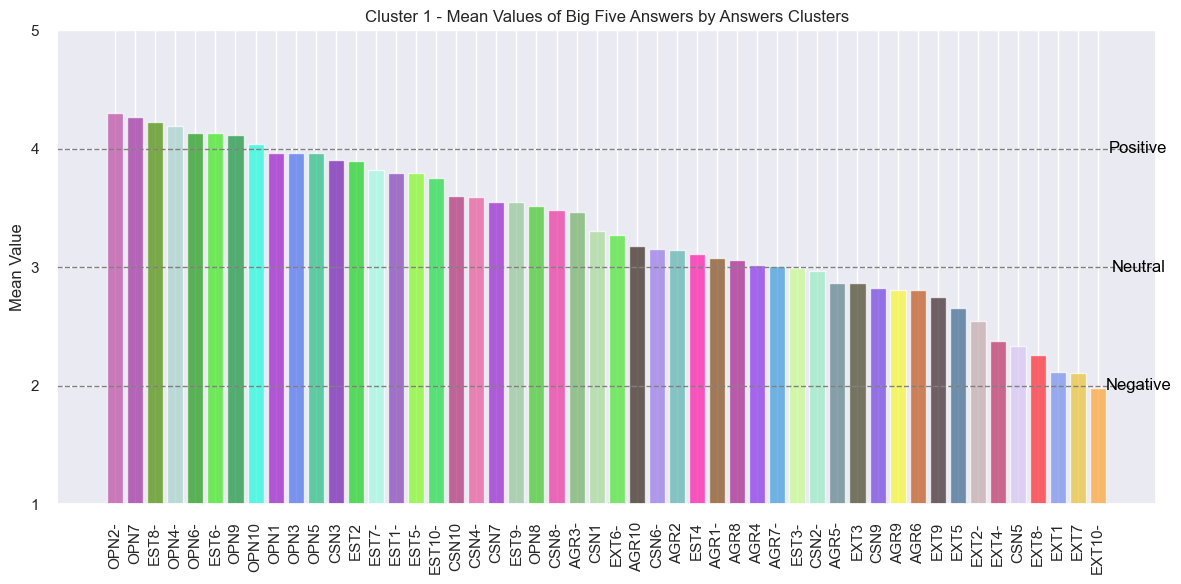

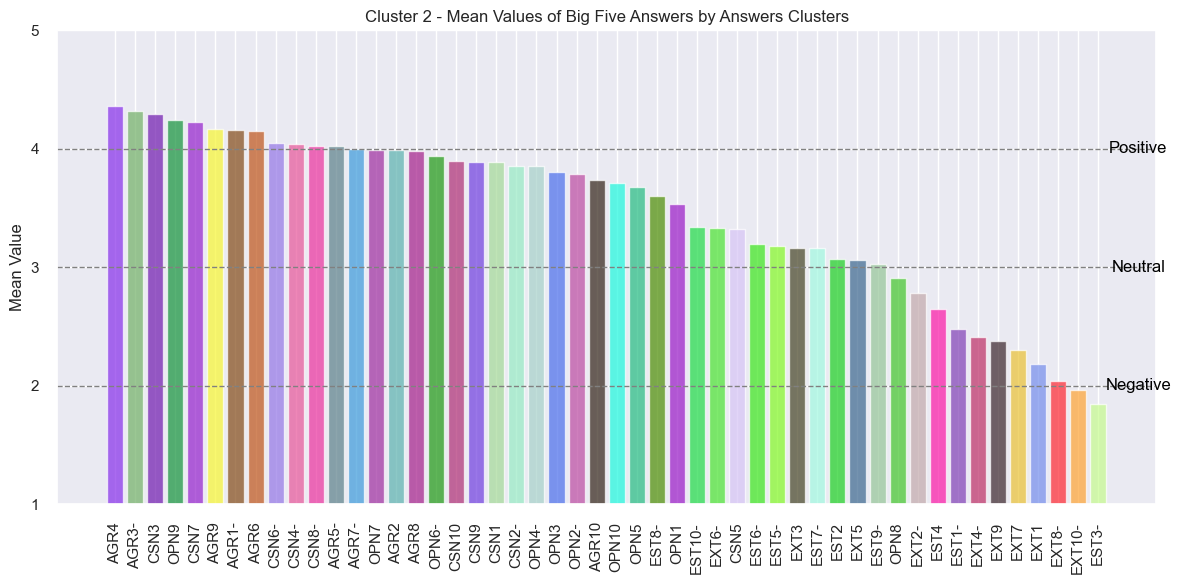

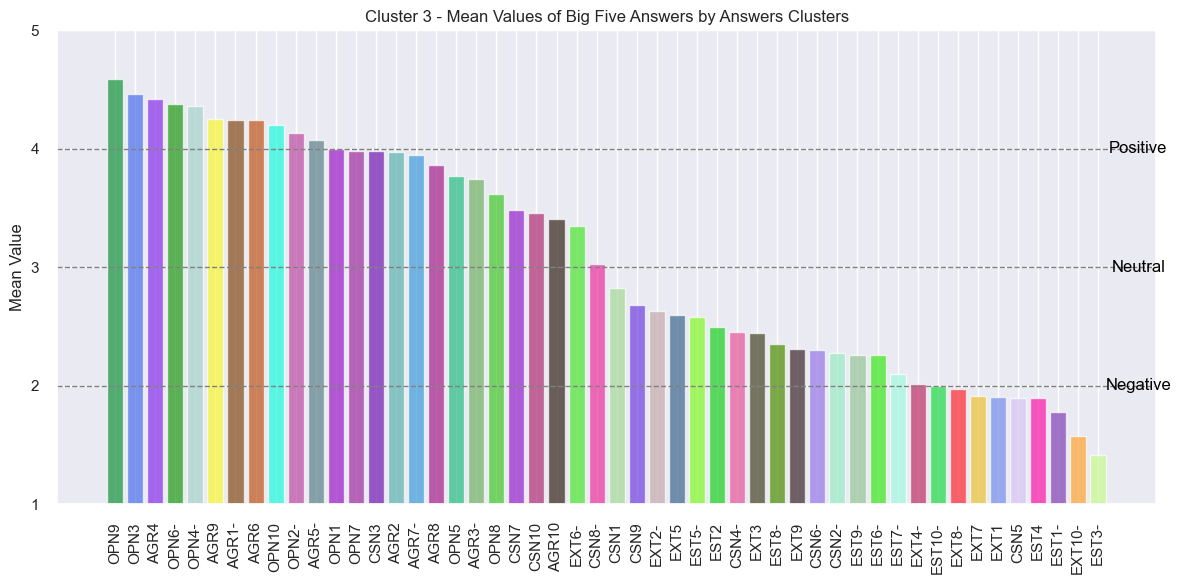

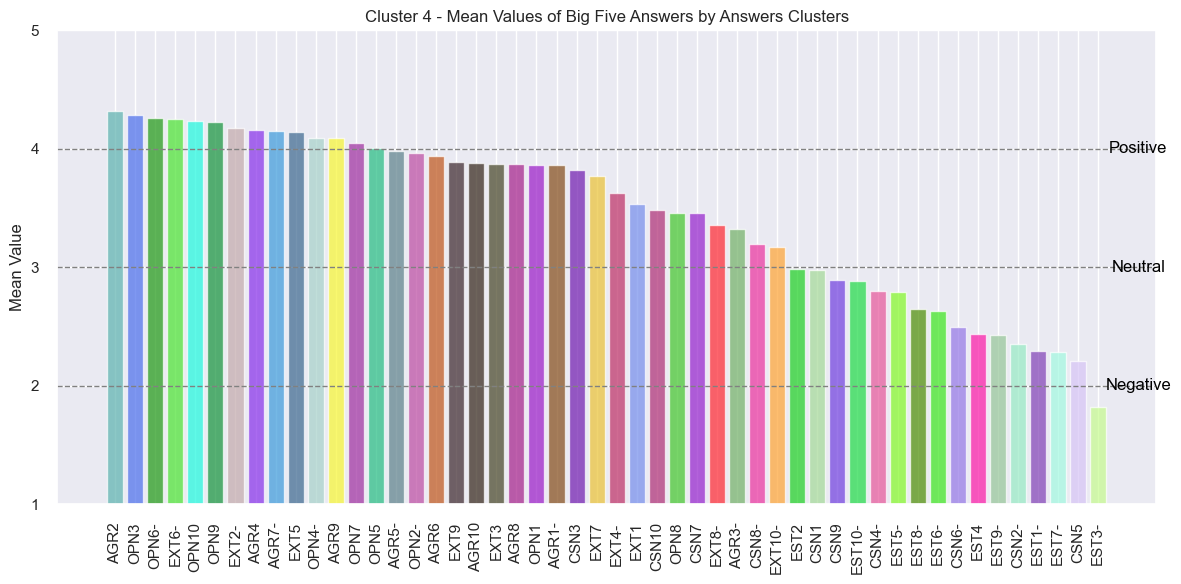

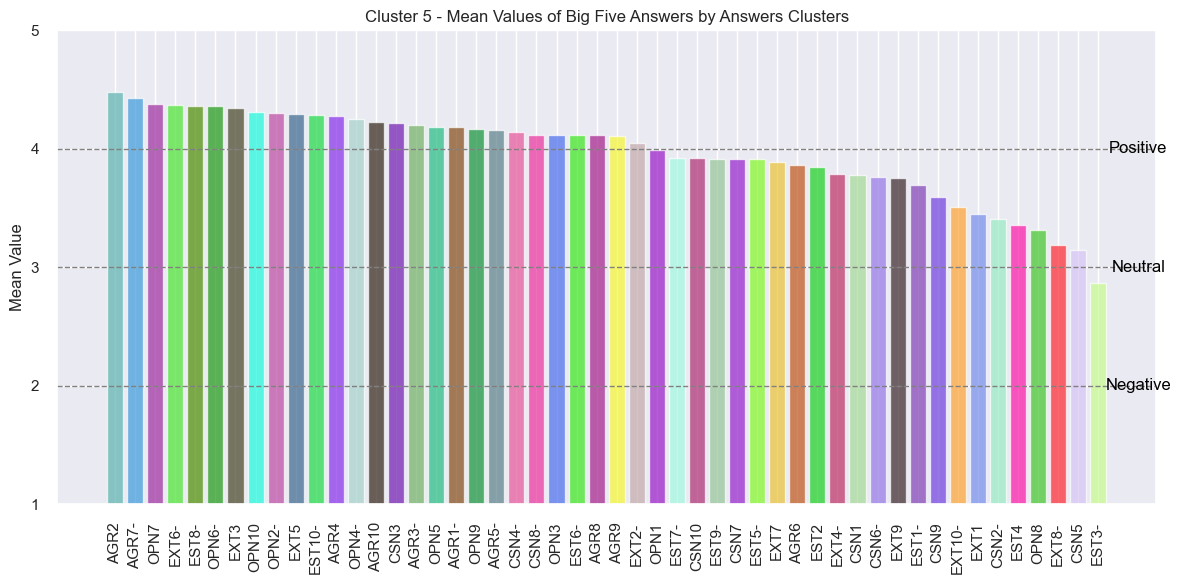

In [27]:
answers_bycluster = answers_with_clusters.groupby('Cluster')
mean_data = answers_bycluster.mean()

num_clusters = len(answers_bycluster)
num_columns_to_visualize = 50

column_colors = {column: np.random.rand(3,) for column in mean_data.columns}

for i in range(num_clusters):
    plt.figure(figsize=(12, 6))
    current_cluster_data = mean_data.loc[i] 
    columns_to_visualize = current_cluster_data.nlargest(num_columns_to_visualize).index.tolist()
    
    # Plotting bar graphs
    for column in columns_to_visualize:
        plt.bar(column, current_cluster_data[column], label=f'Cluster {i}', alpha=0.7, color=column_colors[column])

    # Adding indication lines for how it correlated with the answers
    plt.axhline(y=4, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 4, 'Positive', color='black', ha='center', va='center')
    plt.axhline(y=3, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 3, 'Neutral', color='black', ha='center', va='center')
    plt.axhline(y=2, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 2, 'Negative', color='black', ha='center', va='center')
    
    plt.title(f'Cluster {i} - Mean Values of Big Five Answers by Answers Clusters')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=90)
    
    plt.ylim(1, 5)
    plt.yticks(np.arange(1, 6, 1))
    plt.tight_layout()
    plt.show()

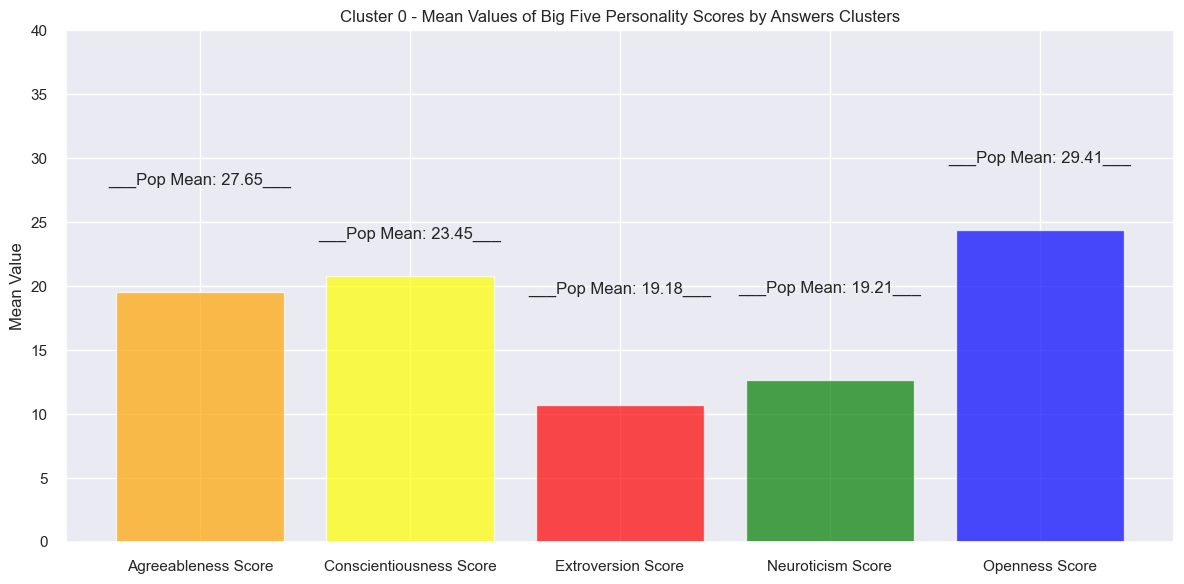

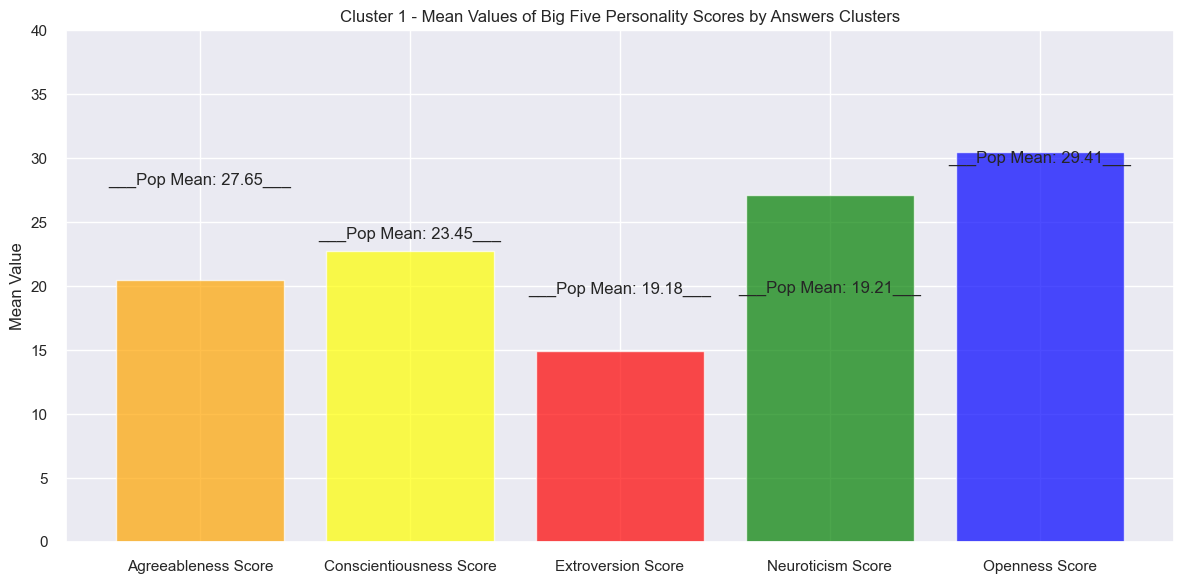

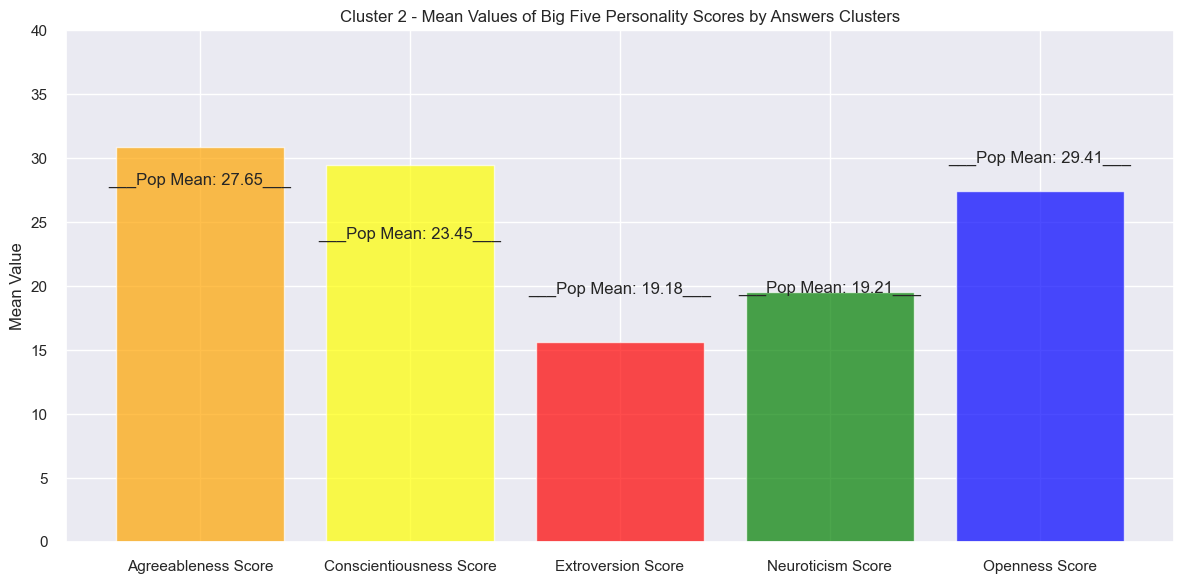

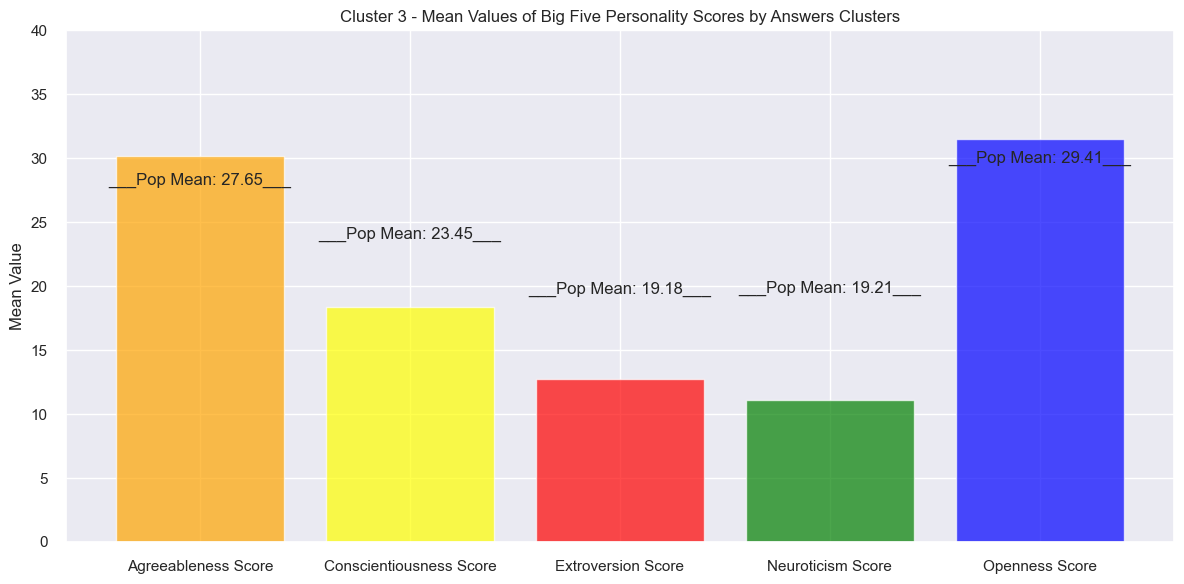

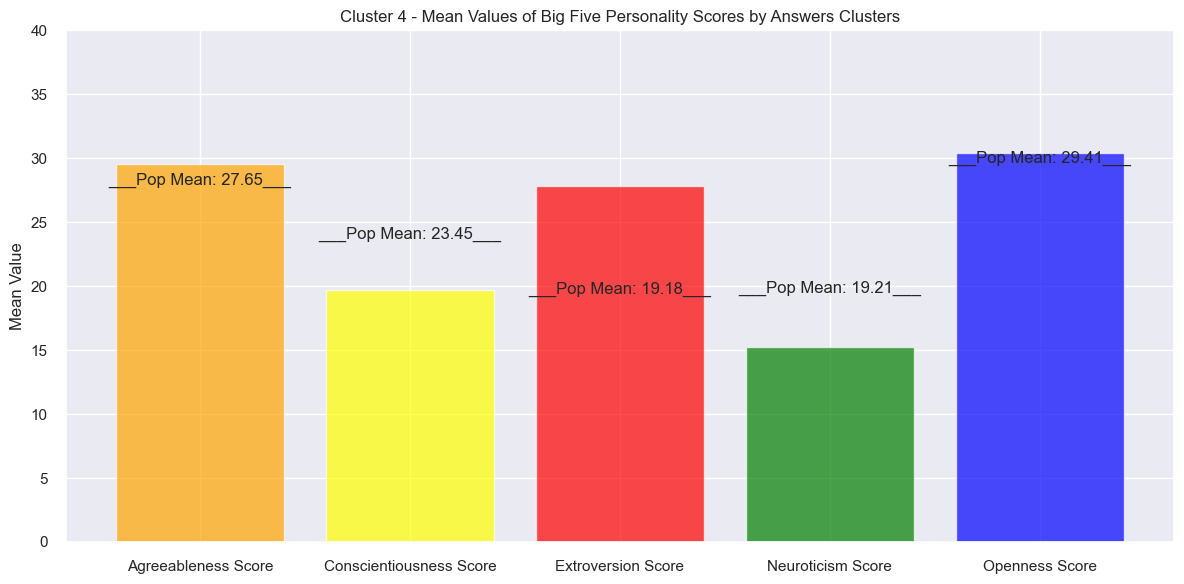

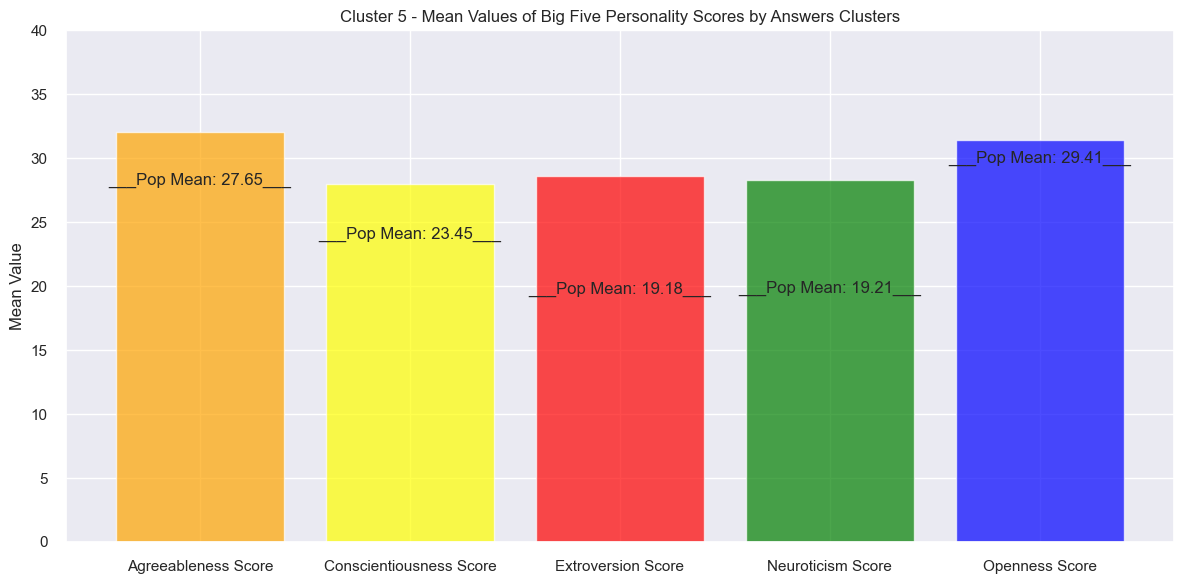

In [28]:
pscores_bycluster = pscores_with_clusters.groupby('Cluster')
mean_data = pscores_bycluster.mean()

num_clusters = len(pscores_bycluster)
num_columns_to_visualize = 5

column_colors = {'Extroversion Score': 'red', 'Agreeableness Score': 'orange', 
                 'Conscientiousness Score': 'yellow', 'Neuroticism Score': 'green', 
                 'Openness Score': 'blue'}

for i in range(num_clusters):
    plt.figure(figsize=(12, 6))
    current_cluster_data = mean_data.loc[i]
    columns_to_visualize = current_cluster_data.nlargest(num_columns_to_visualize).index.tolist()
    columns_to_visualize.sort()
    
    # Plotting bar graphs
    for column in columns_to_visualize:
        color = column_colors.get(column, 'gray')
        bar = plt.bar(column, current_cluster_data[column], label=f'Cluster {i}', alpha=0.7, color=color)
        
        # Adding indication lines for population average, lining up with underscore on annotation
        population_mean = pscores_with_clusters[column].mean()
        #plt.axhline(y=population_mean, color='black', linestyle=' ', linewidth=1)
        bar_index = columns_to_visualize.index(column)
        plt.annotate(f'___Pop Mean: {population_mean:.2f}___', xy=(bar_index, population_mean),
                     xytext=(0, 0), textcoords='offset points', ha='center', va='bottom')

        
    plt.title(f'Cluster {i} - Mean Values of Big Five Personality Scores by Answers Clusters')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.ylim(0, 40)
    plt.tight_layout()
    plt.show()

In [29]:
def plot_dendrogram(model, **kwargs): #From scikit-learn.org
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    linkage_matrix = np.zeros((len(model.children_),4))
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

        if i < len(model.labels_): 
            linkage_matrix[i] = [merge[0], merge[1], model.distances_[i], current_count]

    dendrogram(linkage_matrix, **kwargs)



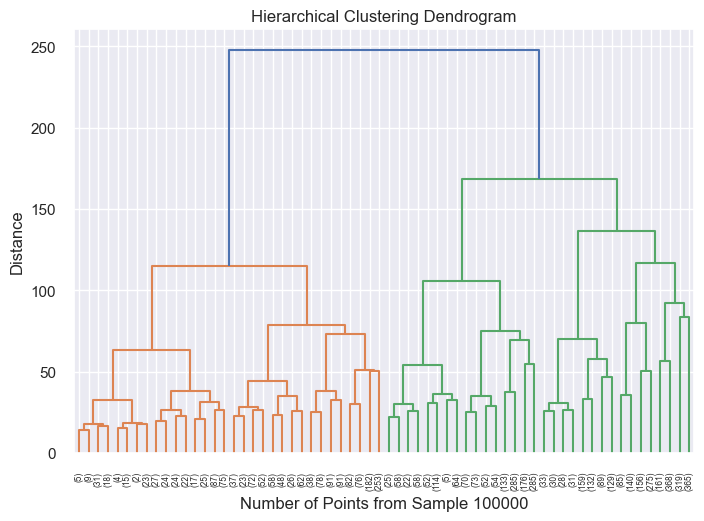

In [30]:
#Perform Hierarchical Clustering for Dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
answers_sample_reduced = answers.sample(frac = 0.01) 

model = model.fit(answers_sample_reduced)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel(f'Number of Points from Sample {answers_sample.shape[0]}')
plt.ylabel('Distance')
plt.show()

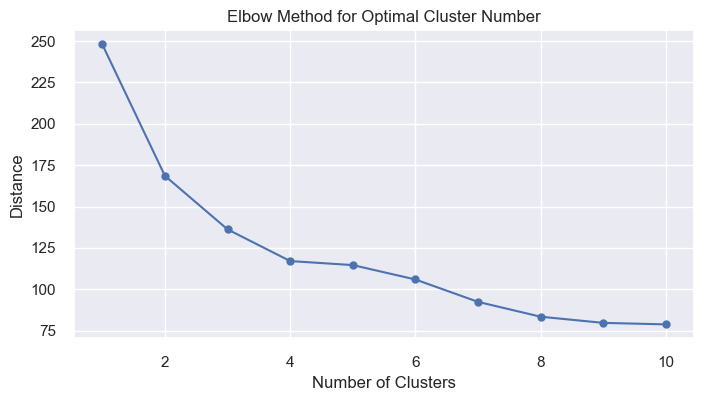

In [32]:
from scipy.spatial.distance import pdist

distance_matrix = pdist(answers_sample_reduced)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Elbow method
last = linkage_matrix[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(8, 4))
plt.plot(idxs, last_rev, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Shows optimal k to be 4